<a href="https://colab.research.google.com/github/pushpamalareddy/6th_sem_project/blob/main/hho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/feature selection/diabetes.csv")
df.head(3)
print(type(df))

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN
df.loc[df["DiabetesPedigreeFunction"] == 0.0, "DiabetesPedigreeFunction"] = np.NAN
df.loc[df["Age"] == 0.0, "Age"] = np.NAN
df.isnull().sum()[0:8]

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

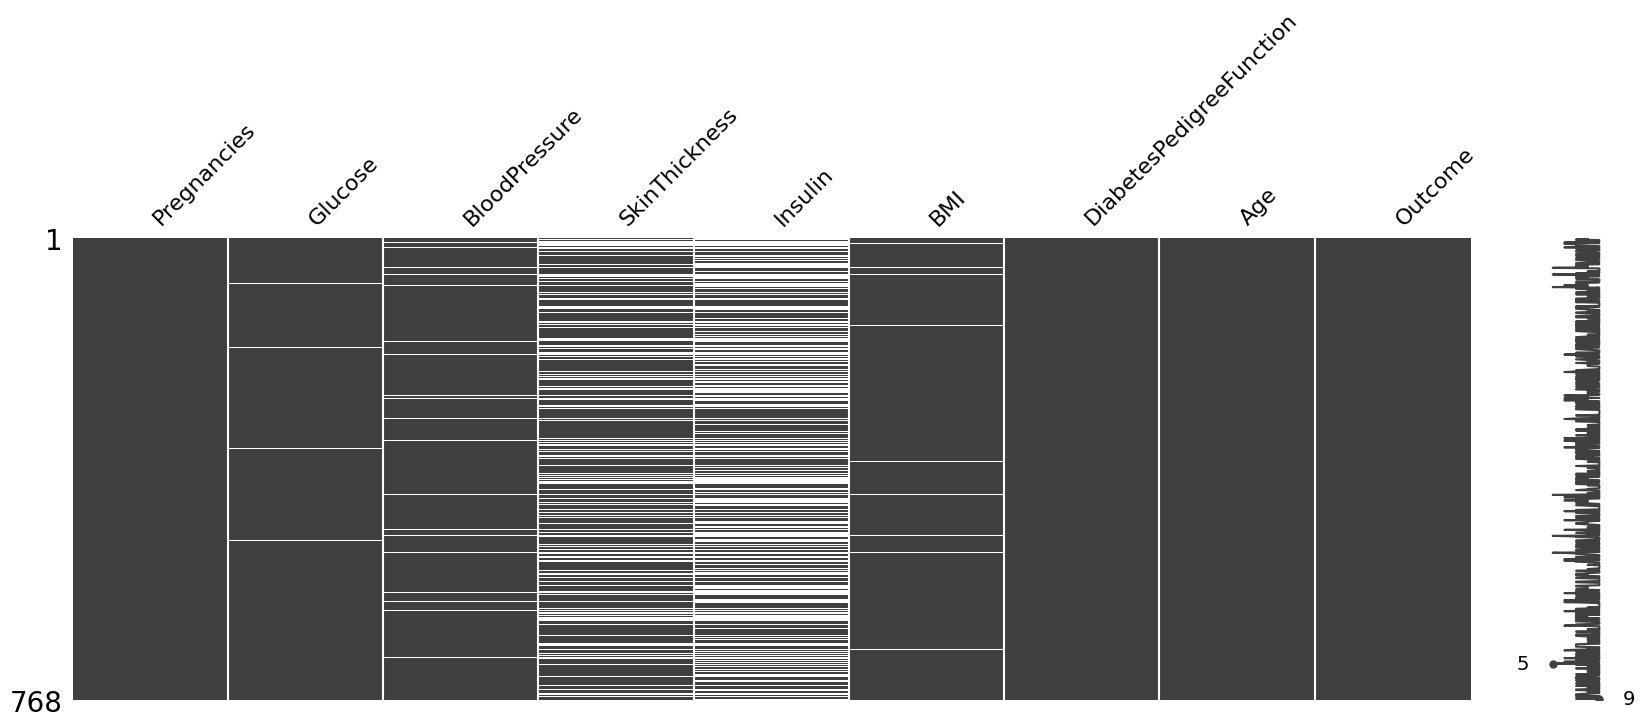

In [ ]:
mno.matrix(df, figsize = (20, 6))

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                

In [ ]:
nan_values = df[df['Glucose'].isna()]
print (nan_values) 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1      NaN           48.0           20.0      NaN  24.7   
182            1      NaN           74.0           20.0     23.0  27.7   
342            1      NaN           68.0           35.0      NaN  32.0   
349            5      NaN           80.0           32.0      NaN  41.0   
502            6      NaN           68.0           41.0      NaN  39.0   

     DiabetesPedigreeFunction   Age  Outcome  
75                      0.140  22.0        0  
182                     0.299  21.0        0  
342                     0.389  22.0        0  
349                     0.346  37.0        1  
502                     0.727  41.0        1  


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
df.isnull().sum()[0:8]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

<Axes: >

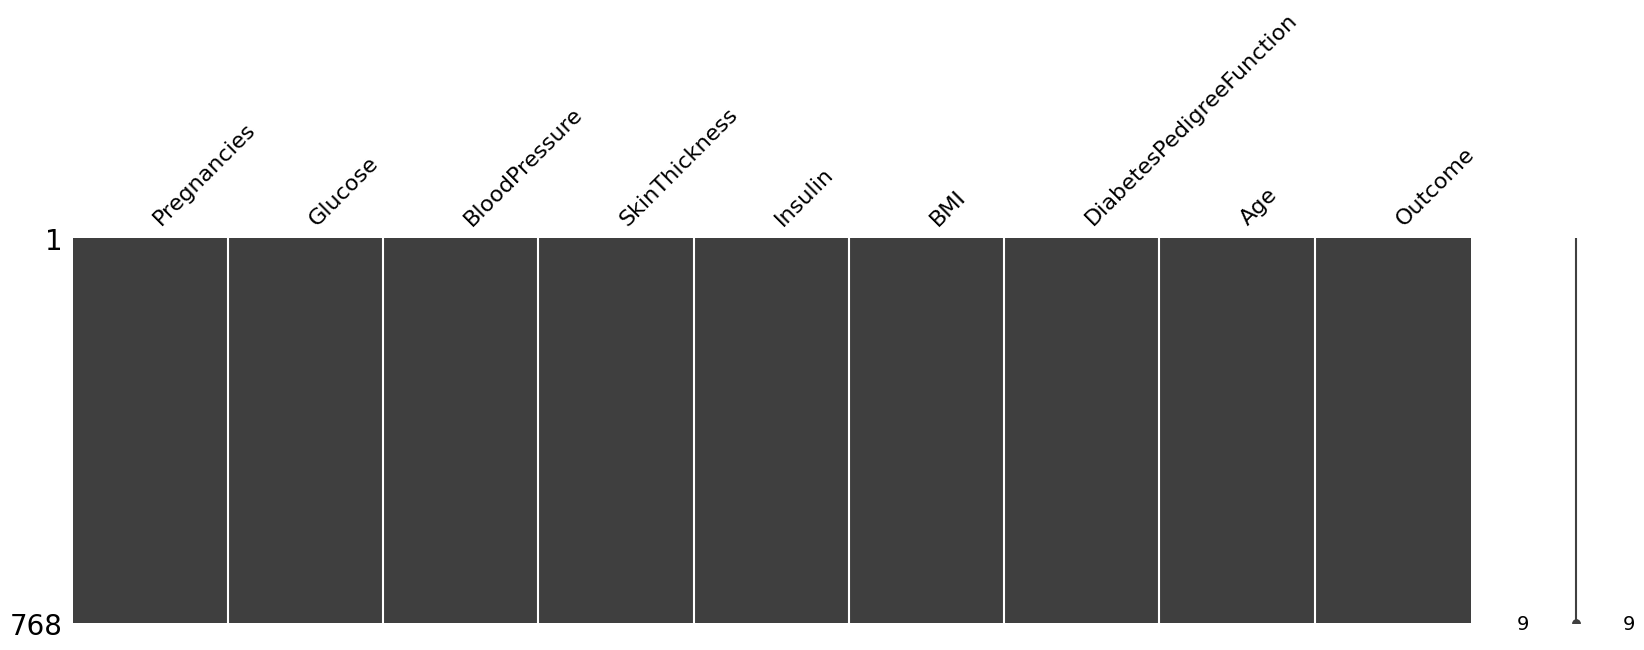

In [ ]:
mno.matrix(df, figsize = (20,5))

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

outlier detection

In [ ]:
df.shape

(768, 9)

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


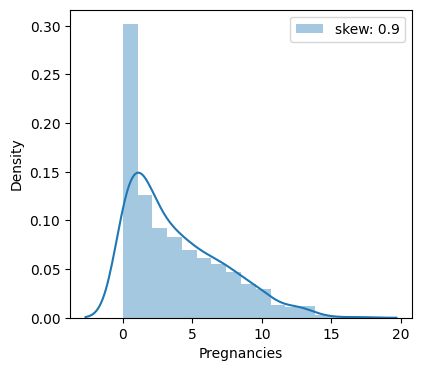

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


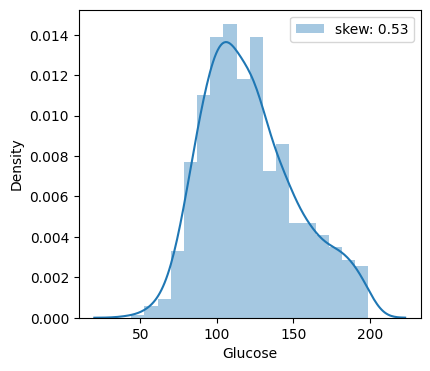

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


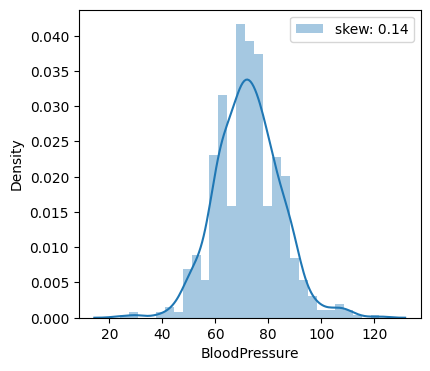

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


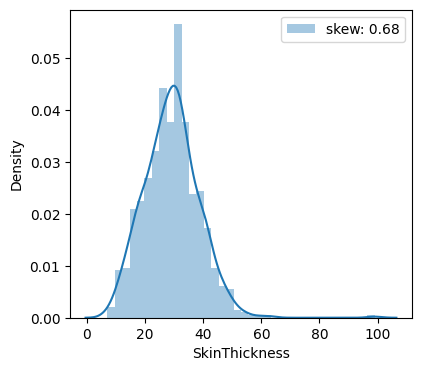

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


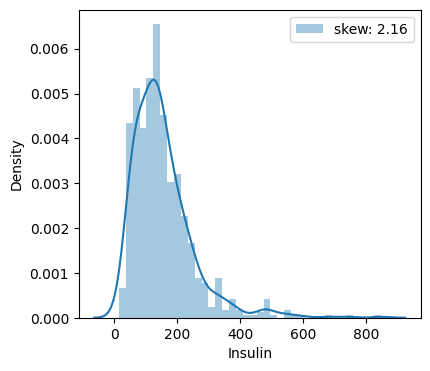

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


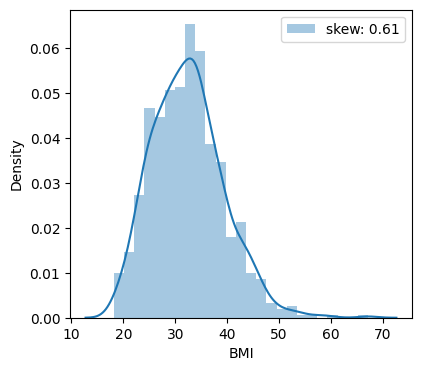

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


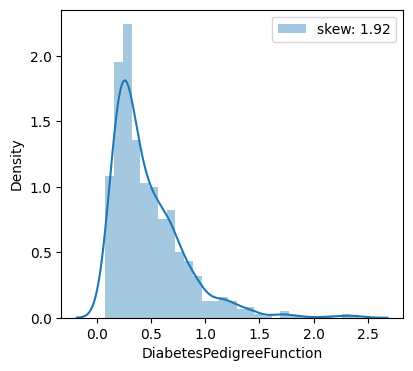

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


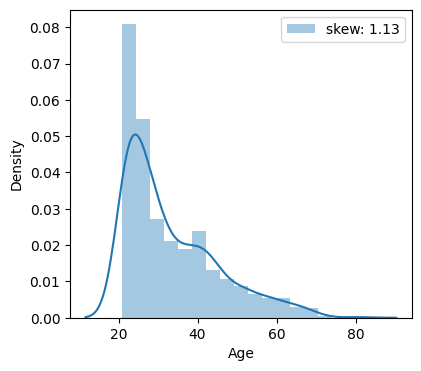

<ipython-input-17-8b3c87eda169>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


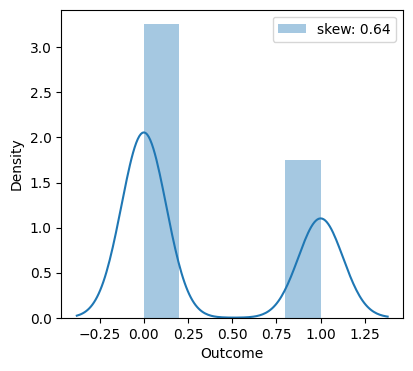

In [ ]:
for col in df:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.show()

In [ ]:
df_trim = df.copy()

In [ ]:
def zscore_trim(df, cols, thr):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        mean = df[col].mean()
        std = df[col].std()
        
        upper_bound = mean + thr*std
        lower_bound = mean - thr*std
        
        s = df[col]
        
        indexes = s[(s>upper_bound) | (s<lower_bound)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
        
    return drop_outliers

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
zscore_trim(df_trim, df.columns, 3)

array([ 88., 159., 298., 455.,  18.,  43., 106., 125., 177., 549., 597.,
       691.,  57., 445., 579.,   8.,  13., 111., 153., 186., 220., 228.,
       247., 286., 319., 370., 409., 415., 486., 584., 655., 695., 753.,
       120., 125., 177., 445., 673.,   4.,  45.,  58., 228., 330., 370.,
       371., 395., 445., 593., 621., 123., 453., 459., 666., 684.])

In [ ]:
dropped = np.unique(zscore_trim(df_trim, df.columns, 3))
dropped

array([  4.,   8.,  13.,  18.,  43.,  45.,  57.,  58.,  88., 106., 111.,
       120., 123., 125., 153., 159., 177., 186., 220., 228., 247., 286.,
       298., 319., 330., 370., 371., 395., 409., 415., 445., 453., 455.,
       459., 486., 549., 579., 584., 593., 597., 621., 655., 666., 673.,
       684., 691., 695., 753.])

In [ ]:
df_trim.drop(labels=dropped, inplace=True)

In [ ]:
df.shape

(768, 9)

In [ ]:
df_trim.shape

(720, 9)

In [ ]:
df=df_trim

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0           20.6    102.8  25.6   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

Standardization using min-max normalization

In [ ]:
df_min_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.670968       0.485714       0.595745  0.362353  0.443804   
1       0.076923  0.264516       0.400000       0.468085  0.102588  0.242075   
2       0.615385  0.896774       0.371429       0.400000  0.352000  0.146974   
3       0.076923  0.290323       0.400000       0.340426  0.185882  0.285303   
5       0.384615  0.464516       0.514286       0.289362  0.206588  0.213256   
..           ...       ...            ...            ...       ...       ...   
763     0.769231  0.367742       0.542857       0.872340  0.388235  0.423631   
764     0.153846  0.503226       0.457143       0.425532  0.352941  0.536023   
765     0.384615  0.496774       0.485714       0.340426  0.228235  0.230548   
766     0.076923  0.529032       0.314286       0.600000  0.280471  0.342939   
767     0.076923  0.316129       0.457143       0.510638  0.121412  0.351585   

     DiabetesPedigreeFunction       Age

In [ ]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0           20.6    102.8  25.6   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

HHO

In [ ]:
X = df.iloc[:, :-1].values
print(X)
y = df.iloc[:, -1].values
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

class HaarisHawksOptimization:
    def __init__(self, num_features, max_iter, pop_size=10, a=1, beta_min=0.2, beta_max=2):
        self.num_features = num_features
        self.max_iter = max_iter
        self.pop_size = pop_size
        self.a = a
        self.beta_min = beta_min
        self.beta_max = beta_max
        
    def initialize(self):
        self.population = np.random.randint(0, 2, size=(self.pop_size, self.num_features))
            
    def evaluate(self, X, y, subset):
        X_subset = X[:, subset]
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        return score
    
    def select_features(self, X, y):
        self.initialize()
        best_score = 0
        for t in range(self.max_iter):
            for i in range(self.pop_size):
                beta = self.beta_min + (self.beta_max - self.beta_min) * np.random.rand()
                r1 = np.random.randint(0, self.pop_size)
                r2 = np.random.randint(0, self.pop_size)
                x_new = self.population[i] + self.a * (self.population[r1] - self.population[r2])
                x_new = np.clip(x_new, 0, 1)
                
                if np.random.rand() < beta:
                    j_rand = np.random.randint(0, self.num_features)
                    x_new[j_rand] = 1 - x_new[j_rand]
                    
                score = self.evaluate(X, y, x_new)
                if score > self.evaluate(X, y, self.population[i]):
                    self.population[i] = x_new
                    
                if score > best_score:
                    best_score = score
                    best_subset = x_new
                    
        selected_features = np.where(best_subset == 1)[0]
        return selected_features


In [ ]:
hho = HaarisHawksOptimization(num_features=X.shape[1], max_iter=100)
selected_features = hho.select_features(X, y)
print(selected_features)

[0 1 2 3 7]


In [ ]:
hho_feat=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Age','Outcome']].copy()

Classification using KNN

In [ ]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline

In [ ]:
split = 0.75 # 75% train and 25% test dataset
total_len = len(hho_feat)
split_df = int(total_len*split)
train, test = hho_feat.iloc[:split_df,0:6],hho_feat.iloc[split_df:,0:6] 
x_train = train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Age']]
y_train = train['Outcome']
x_test= test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Age']]
y_test= test['Outcome']

In [ ]:
a = len(x_train) 
b = len(x_test)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 540 
 Testing data = 180 
 Total data length =  720


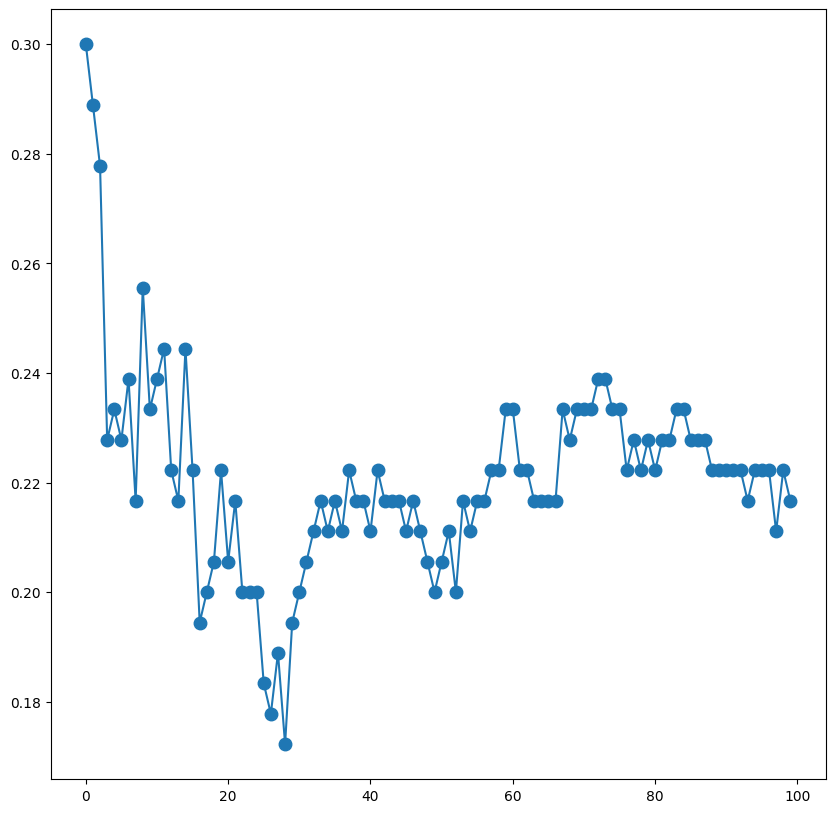

In [ ]:
output=[]
error_rate = []
n_range = range(1, 101)
def knn(x_train, y_train, x_test, y_test,n):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        error_rate.append(np.mean(predict_y!= y_test))
        return accuracy      
        
for i in range(1,101):
  output.append(knn(x_train, y_train, x_test, y_test,i))
plt.figure(figsize=(10,10))
plt.plot(range(0,100),error_rate, marker='o', markersize=9) 

In [ ]:
n=np.min(error_rate)
print(n)
for i in range(0,100):
  if(error_rate[i]==n):
    k=i
print("optimized k value",k)

0.17222222222222222
optimized k value 28


In [ ]:
knn = KNeighborsClassifier(28)
knn.fit(x_train, y_train)
predict_y = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predict_y)
print(accuracy)

0.8111111111111111


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_y))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       117
         1.0       0.75      0.68      0.72        63

    accuracy                           0.81       180
   macro avg       0.80      0.78      0.79       180
weighted avg       0.81      0.81      0.81       180



Classification using svm

In [ ]:
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7833333333333333


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85       117
         1.0       0.79      0.52      0.63        63

    accuracy                           0.78       180
   macro avg       0.78      0.72      0.74       180
weighted avg       0.78      0.78      0.77       180



Classification using Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, pred_y))

Accuracy: 0.8


In [ ]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       117
         1.0       0.71      0.73      0.72        63

    accuracy                           0.80       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.80      0.80      0.80       180

